In [26]:
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse
from scipy import sparse 
from sklearn.datasets import make_classification, make_blobs, load_boston 
from sklearn.decomposition import PCA 
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.learning_curve import learning_curve 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from pprint import pprint 
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 
import urllib
from IPython.display import display
#import seaborn

np.random.seed(sum(map(ord, "aesthetics"))) 

#pd.set_option('display.mpl_style', 'default') #beatiful graphs
plt.rcParams['figure.figsize'] = (15, 5)

#set pandas options

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 25)
pd.options.display.max_colwidth = 50

%matplotlib inline

In [27]:
#upload both datasets in two different variables

train_set = pd.read_csv('train.csv', index_col = 'Id')
test_set = pd.read_csv('test.csv', index_col = 'Id')

#keep a copy of both datasets as back-up

original_train_set = train_set.copy()
original_test_set = test_set.copy()

total_rows = train_set.count
#print (total_rows)
#display(train_set.head(20))


In [4]:
#train_set.dtypes


In [5]:
#I check if we have null values since everything since ok at the first sight

#train_set[train_set.isnull().any(axis=1)]

In [6]:
#pd.set_option('display.max_columns', None) # we need to see all the columns
#train_set.describe()

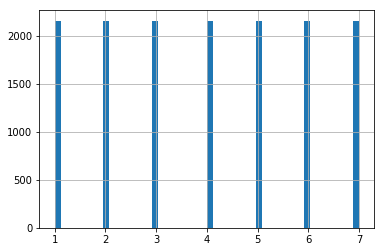

In [7]:
train_set.Cover_Type.hist(bins=50)
plt.show()

In [41]:
rf_first = RandomForestClassifier(n_estimators=500)
rf_first.fit(train_set.ix[:,:-1].values, train_set.ix[:,-1:].values.ravel())
print ("Train set score: %.2f" %rf_first.score(train_set.ix[:,:-1].values, train_set.ix[:,-1:].values.ravel()))

Train set score: 1.00


In [42]:

#Make a copy of the test.csv file 
temp=test_set.copy() 

#Run Predictions on test.csv 
temp['Cover_Type']=rf_first.predict(temp.values) 

#Create Submissions csv file 
"""
temp=temp['Cover_Type'] 
temp.to_csv('RF-first.csv', header=True)"""

"\ntemp=temp['Cover_Type'] \ntemp.to_csv('RF-first.csv', header=True)"

In [43]:
# after I detected no null values
# I write a function to measure the feature importances

def importances(estimator, col_array, title):
    
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("%s Top 20 features\n" %title)
    for f in range(20):
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]]))
    
    print("\nMean Feature Importance %.6f" %np.mean(importances))
    
    indices = indices[:10]
    plt.figure()
    plt.title(title+" Top 10 most important features")
    plt.bar(range(10), importances[indices], 
            color = "gr", align = "center", label=indices) 
    #train_set.columns=[importances[indices]]
    #plt.xticks(range(10), col_array.columns[indices], frontsize=20, rotation=90)
    plt.xlim([-1, 10])
    plt.show()
 

Cover Type Top 20 features

1. Elevation (0.225350)
2. Horizontal_Distance_To_Roadways (0.092123)
3. Horizontal_Distance_To_Fire_Points (0.073993)
4. Horizontal_Distance_To_Hydrology (0.063236)
5. Vertical_Distance_To_Hydrology (0.053313)
6. Hillshade_9am (0.050844)
7. Aspect (0.049724)
8. Hillshade_3pm (0.046118)
9. Wilderness_Area4 (0.045027)
10. Hillshade_Noon (0.044778)
11. Slope (0.035979)
12. Soil_Type10 (0.022931)
13. Soil_Type38 (0.019515)
14. Soil_Type3 (0.018633)
15. Wilderness_Area1 (0.018276)
16. Soil_Type39 (0.018144)
17. Wilderness_Area3 (0.016202)
18. Soil_Type4 (0.012880)
19. Soil_Type40 (0.010058)
20. Soil_Type30 (0.007796)

Mean Feature Importance 0.018519


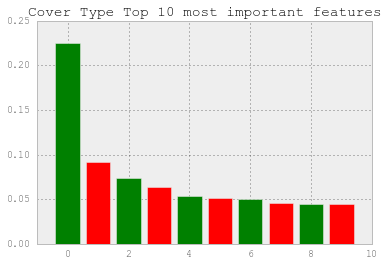

In [44]:
importances(rf_first, train_set, "Cover Type")

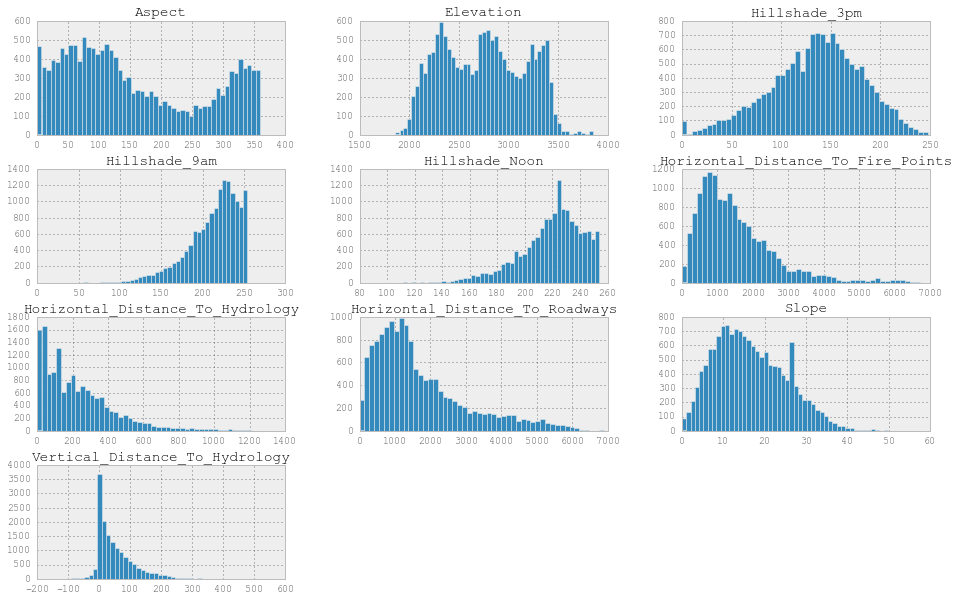

In [45]:
train_set.ix[:,:10].hist(figsize=(16,10), bins=50) 
plt.show()

In [46]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(train_set)
sample = [10, 20, 30]

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[sample], columns = data.keys()).reset_index(drop = True)
print (log_samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

NameError: name 'data' is not defined

In [ ]:
smaller_frame = train_set[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']]
smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Horizontal_Distance_To','HD')) 
smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Vertical_Distance_To','VD')) 
scatter_matrix(smaller_frame, figsize=(14, 14), diagonal="kde") 
plt.show()

In [ ]:
size = 10
data = train_set.iloc[:,:size]
# Get name of the columns
cols = data.columns

# Calculate the pearson correlation coefficients for all combinations
data_corr = data.corr()

# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []

In [ ]:
data_corr

In [ ]:
for i in range(0, size):
    for j in range(i+1, size):
        if data_corr.iloc[i,j]>= threshold and data_corr.iloc[i,j]<1\
        or data_corr.iloc[i,j] <0 and data_corr.iloc[i,j]<=-threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])

In [ ]:
# Sorting the values
s_corr_list = sorted(corr_list,key= lambda x: -abs(x[0]))

# print the higher values
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

In [ ]:
# Checking the value count for different soil_types
for i in range(10, train_set.shape[1]-1):
    j = train_set.columns[i]
    print (train_set[j].value_counts())

In [ ]:
# From both train and test data
train_set = train_set.drop(['Soil_Type7', 'Soil_Type15','Soil_Type8', 'Soil_Type25'], axis=1)
test_set = test_set.drop(['Soil_Type7', 'Soil_Type15','Soil_Type8', 'Soil_Type25'], axis=1)

# Also drop 'Id'
train_set = train_set.iloc[:,1:]
test_set = test_set.iloc[:,1:]

In [12]:
train1_set = train_set # To be used for algos like SVM where we need normalization and StandardScaler
test1_set = test_set

In [28]:
# Taking only non-categorical values
Size = 10
X_temp = train_set.iloc[:,:Size]
X_test_temp = test_set.iloc[:,:Size]
X_temp1 = train1_set.iloc[:,:Size]
X_test_temp1 = test1_set.iloc[:,:Size]

In [29]:
X_temp1 = StandardScaler().fit_transform(X_temp1)
X_test_temp1 = StandardScaler().fit_transform(X_test_temp1)

In [30]:
r,c = train_set.shape
X_train = np.concatenate((X_temp,train_set.iloc[:,Size:c-1]),axis=1)
X_train1 = np.concatenate((X_temp1, train1_set.iloc[:,Size:c-1]), axis=1) # to be used for SVM
y_train = train_set.Cover_Type.values

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# setting parameters random state 123
#x_data, x_test_data, y_data, y_test_data = train_test_split(X_train,y_train,test_size= 0.3, random_state=123)

# setting parameters random state 35
#x_data, x_test_data, y_data, y_test_data = train_test_split(X_train,y_train,test_size= 0.3, random_state=35)

# setting parameters random state 136
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train,y_train,test_size= 0.3, random_state=136)


etc_para = [{'n_estimators':[100], 'max_depth':[15], 'max_features':[0.3]}]
svm_para = [{'kernel':['rbf'],'C': [1,10,100,100]}]
# Default number of features is sqrt(n)
# Default number of min_samples_leaf is 1

In [ ]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

x_data, x_test_data, y_data, y_test_data = train_test_split(X_train1,y_train,test_size=0.2, random_state=123)
svm_para = [{'kernel':['rbf'],'C': [1,10,100,100]}]

In [ ]:
# Setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train1,y_train,test_size=0.2, random_state=123)
svm_para = [{'kernel':['rbf'],'C': [1,10,100,100]}]

In [ ]:
# Parameters optimized using the code in above cell
C_opt = 10 # reasonable option
clf = svm.SVC(C=C_opt,kernel='rbf')
clf.fit(X_train1,y_train)

In [ ]:
clf.score(X_train1,y_train)

In [ ]:
#Make a copy of the test.csv file 

temp=test_set.copy() 

#Run Predictions on test.csv 
temp['Cover_Type']=clf.predict(temp.values) #Create Submissions csv file 
temp=temp['Cover_Type'] 
temp.to_csv('SVM.csv', header=True)

In [33]:
from sklearn.metrics import accuracy_score

In [23]:
ETC = GridSearchCV(ExtraTreesClassifier(),param_grid=etc_para, cv=10, n_jobs=-1)
ETC.fit(x_data, y_data)
ETC.best_params_
ETC.grid_scores_

[mean: 0.82663, std: 0.00747, params: {'max_features': 0.3, 'n_estimators': 100, 'max_depth': 15}]

In [18]:
print ('Best accuracy obtained: {}'.format(ETC.best_score_))
print ('Parameters:')
for key, value in ETC.best_params_.items():
    print('\t{}:{}'.format(key,value))

Best accuracy obtained: 0.830309901738
Parameters:
	max_features:0.3
	n_estimators:100
	max_depth:15


In [52]:
# Classification Report
Y_pred = ETC.predict(x_test_data)
target = ['class1', 'class2','class3','class4','class5','class6','class7' ]
acc = accuracy_score(y_test_data, Y_pred)
print (classification_report(y_test_data, Y_pred, target_names=target))

print ('Accuracy score: {}%'.format(acc*100))

             precision    recall  f1-score   support

     class1       0.87      0.88      0.88       650
     class2       0.88      0.77      0.82       673
     class3       0.95      0.92      0.93       667
     class4       0.97      1.00      0.98       627
     class5       0.85      0.97      0.90       646
     class6       0.92      0.93      0.93       641
     class7       0.98      0.97      0.98       632

avg / total       0.92      0.92      0.92      4536

Accuracy score: 91.6666666667%


In [ ]:
#Make a copy of the test.csv file 

temp=test_set.copy() 

#Run Predictions on test.csv 
temp['Cover_Type']=ETC.predict(temp.values) #Create Submissions csv file 
temp=temp['Cover_Type'] 
temp.to_csv('ETC.csv', header=True)

In [49]:
rf_second = RandomForestClassifier(n_estimators=500)
rf_second.fit(x_data, y_data)
print ("Train set score: %.2f" %rf_second.score(x_data, y_data))

Train set score: 1.00


In [53]:
# Classification Report
Y_pred = rf_second.predict(x_test_data)
target = ['class1', 'class2','class3','class4','class5','class6','class7' ]
acc = accuracy_score(y_test_data, Y_pred)
print (classification_report(y_test_data, Y_pred, target_names=target))
print ('Accuracy score: {}%'.format(acc*100))

             precision    recall  f1-score   support

     class1       0.93      0.93      0.93       650
     class2       0.95      0.90      0.92       673
     class3       0.96      0.96      0.96       667
     class4       0.97      1.00      0.98       627
     class5       0.97      0.99      0.98       646
     class6       0.96      0.96      0.96       641
     class7       0.97      0.99      0.98       632

avg / total       0.96      0.96      0.96      4536

Accuracy score: 95.9656084656%


In [ ]:
#Make a copy of the test.csv file 

temp=test_set.copy() 

#Run Predictions on test.csv 
temp['Cover_Type']=rf_second.predict(temp.values) #Create Submissions csv file 
temp=temp['Cover_Type'] 
temp.to_csv('RF_second.csv', header=True)

In [ ]:
train_set.iloc[:,:10].skew()

In [ ]:
(train_set == 0).astype(int).sum(axis=1)

In [ ]:
train_set.apply( lambda s : s.value_counts().get(0,0), axis=1)

In [ ]:
smaller_frame = train_set[['Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm']] 
scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
plt.show()

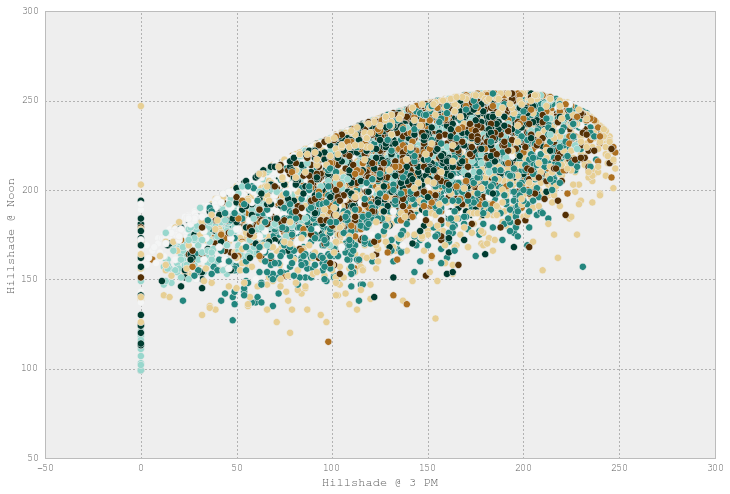

In [47]:
plt.figure(figsize=(12,8)) 
plt.scatter(train_set.Hillshade_3pm,train_set.Hillshade_Noon, c=train_set.Cover_Type, s=50, cmap=plt.cm.BrBG) 
plt.xlabel('Hillshade @ 3 PM') 
plt.ylabel('Hillshade @ Noon') 
plt.show()

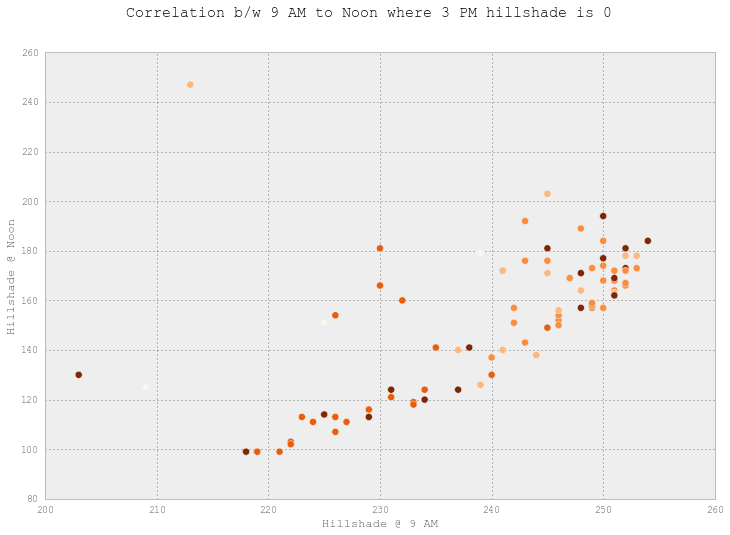

In [48]:
smaller_frame=train_set[train_set.Hillshade_3pm==0] 
plt.figure(figsize=(12,8)) 
plt.scatter(smaller_frame.Hillshade_9am,smaller_frame.Hillshade_Noon, c=smaller_frame.Cover_Type, s=50, cmap=plt.cm.Oranges) 
plt.suptitle('Correlation b/w 9 AM to Noon where 3 PM hillshade is 0', fontsize=15) 
plt.xlabel('Hillshade @ 9 AM') 
plt.ylabel('Hillshade @ Noon') 
plt.show()

In [ ]:
#Make a copy and Reorder train.csv columns 
temp=train_set.copy() 
cols=temp.columns.tolist() 
cols=cols[:8]+cols[9:]+[cols[8]] 
temp=temp[cols] #Delete the Forest Cover Type column. We can't train on this since it doesn't exist in the test.csv file 
del temp['Cover_Type']

In [ ]:
#Split the train.csv file into train (available values) and missing values based on hillshade 3 PM. 
X,y,X_train_set_missing,y_train_set_missing= temp[temp.Hillshade_3pm!=0].values[:,:-1], temp[temp.Hillshade_3pm!=0].values[:,-1:].ravel(),  temp[temp.Hillshade_3pm==0].values[:,:-1], temp[temp.Hillshade_3pm==0].values[:,-1:].ravel() 
                                             
                                            
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
#Fit a Gradient Boosted Regression Tree model to this dataset.
gbrt=GradientBoostingRegressor(n_estimators=500)
gbrt.fit(X_train,y_train)